In [23]:
import pyart
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


In [3]:
#file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira.nc'
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira_ec09dc9c.nc'
dayFile = nc.Dataset(file_path)

dbz = np.array(dayFile.variables['Zh'])
dbz[dbz > 1000] = np.nan
z = 10 ** (dbz / 10)
height = np.array(dayFile.variables['height'])
time = np.array(dayFile.variables['time'])

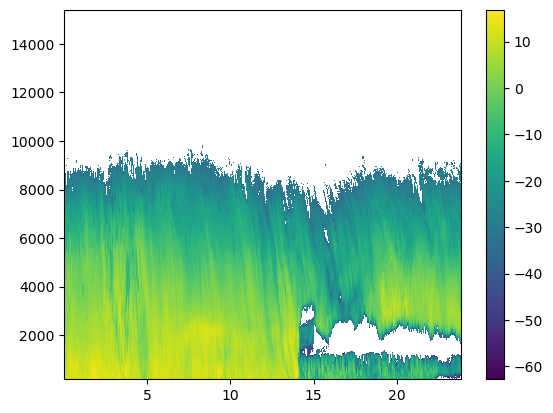

In [61]:
T, H = np.meshgrid(time, height)
plt.pcolormesh(time, height, dbz.T, shading='auto')
plt.colorbar()
#plt.ylim(top=500)

In [4]:
# Empirical constants from Makrosov et al. (2022), Souverijns et al. (2017)
aLower = 11
aHigher = 63
b = 1.1

precipLower = (z / aHigher) ** (1 / b)
precipHigher = (z / aLower) ** (1 / b)


T, H = np.meshgrid(time, height)

Text(0.5, 1.0, 'Radar reflectivity precipitation')

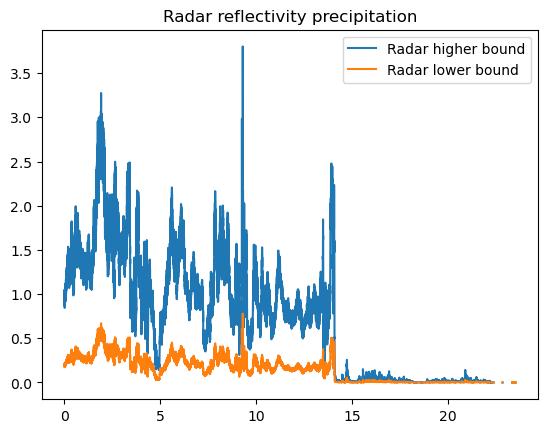

In [5]:
plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [6]:
disfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/disdrometer/20230426_neumayer_parsivel_0bc7d487.nc'
disdayFile = nc.Dataset(disfile_path)

In [7]:
rainRate = np.array(disdayFile.variables['rainfall_rate']) * 1000 * 60 * 60 # time units
snowRate = (rainRate ** 1.9) * 0.03344 # Matrosov et al (2022) mass size relation
disTime = np.array(disdayFile.variables['time'])


Text(0.5, 1.0, 'Radar reflectivity precipitation')

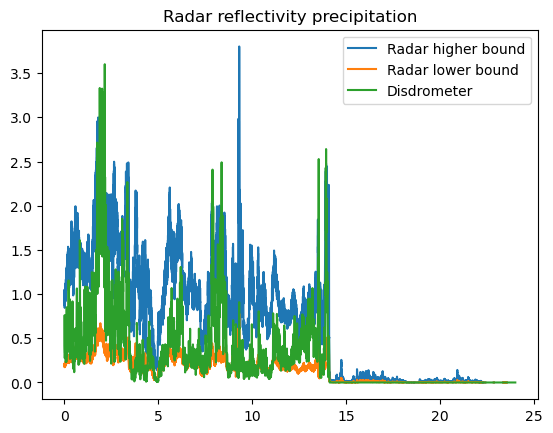

In [8]:
plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.plot(disTime, snowRate, label='Disdrometer')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [71]:
print(dayFile)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.8
    cloudnetpy_version: 1.66.11
    file_uuid: 06da30c5-a9ef-4e94-8d23-285e45ce8c8c
    cloudnet_file_type: radar
    title: MIRA-35 cloud radar from Neumayer Station
    year: 2023
    month: 04
    day: 26
    location: Neumayer Station
    history: 2024-11-14 09:21:56 +00:00 - radar file created
    source: METEK MIRA-35
    references: https://doi.org/10.21105/joss.02123
    pid: https://hdl.handle.net/21.12132/1.06da30c5a9ef4e94
    cloudnet_processing_version: 2.44.6
    instrument_pid: https://hdl.handle.net/21.12132/3.ec09dc9c028c42d1
    dimensions(sizes): time(27883), range(496)
    variables(dimensions): float32 Zh(time, range), float32 v(time, range), float32 width(time, range), float32 ldr(time, range), float32 SNR(time, range), float32 azimuth_angle(time), int32 nfft(), int32 nave(), int32 prf(), int32 rg0(), float32 range(range), float32 time(time), float32 latitu

In [83]:
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230128_neumayer_mira.nc'
dayFile = nc.Dataset(file_path)

print(dayFile)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.8
    cloudnetpy_version: 1.66.11
    file_uuid: a100274d-21af-4152-aa17-13493ffbbcc6
    cloudnet_file_type: radar
    title: MIRA-35 cloud radar from Neumayer Station
    year: 2023
    month: 01
    day: 28
    location: Neumayer Station
    history: 2024-11-14 09:15:37 +00:00 - radar file created
    source: METEK MIRA-35
    references: https://doi.org/10.21105/joss.02123
    pid: https://hdl.handle.net/21.12132/1.a100274d21af4152
    cloudnet_processing_version: 2.44.6
    instrument_pid: https://hdl.handle.net/21.12132/3.ec09dc9c028c42d1
    dimensions(sizes): time(42047), range(496)
    variables(dimensions): float32 Zh(time, range), float32 v(time, range), float32 width(time, range), float32 ldr(time, range), float32 SNR(time, range), float32 azimuth_angle(time), int32 nfft(), int32 nave(), int32 prf(), int32 rg0(), float32 range(range), float32 time(time), float32 latitu

In [84]:
print(disdayFile)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    year: 2023
    month: 04
    day: 26
    Conventions: CF-1.8
    cloudnet_file_type: disdrometer
    source: OTT HydroMet Parsivel2
    location: Neumayer Station
    title: Parsivel2 disdrometer from Neumayer Station
    references: https://doi.org/10.21105/joss.02123
    history: 2025-04-07 08:01:02 +00:00 - disdrometer metadata harmonized by CLU using cloudnet-processing v2.53.3
Data acquired with python script parsivel2nc.py
    file_uuid: 8f1587d3-b15a-4ea1-9092-f9940850a8f4
    serial_number: 450727
    pid: https://hdl.handle.net/21.12132/1.8f1587d3b15a4ea1
    cloudnet_processing_version: 2.53.3
    instrument_pid: https://hdl.handle.net/21.12132/3.0bc7d48784f14637
    dimensions(sizes): time(2879), diameter(32), velocity(32), nv(2)
    variables(dimensions): float64 time(time), int32 interval(time), float32 diameter(diameter), float32 diameter_spread(diameter), float32 diameter_bnds(diamet

In [9]:
#file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira.nc'
modfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/era_precip/a5fe22a8557d37e66a32d5412c5f2411.nc'
model = nc.Dataset(modfile_path)

# Coords of Neumayer III
minMod = np.array(model.variables['mntpr'][:, 23, 87]) * 60 * 60
maxMod = np.array(model.variables['mxtpr'][:, 23, 87]) * 60 * 60

print(model)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-06-09T10:33 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "tmp7xxvkl77/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["max"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(8760), latitude(41), longitude(241)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 mxtpr(valid_time, latitude, longitude), float32 mntpr(valid_time, latitude, longitude)
    groups: 


In [13]:
print(model.variables['valid_time'])

<class 'netCDF4.Variable'>
int64 valid_time(valid_time)
    long_name: time
    standard_name: time
    units: seconds since 1970-01-01
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (8760,)
filling on, default _FillValue of -9223372036854775806 used


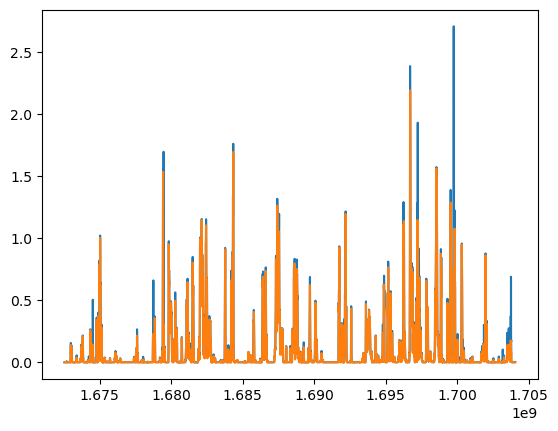

In [11]:
plt.plot(np.array(model.variables['valid_time']), maxMod)
plt.plot(np.array(model.variables['valid_time']), minMod)

Text(0.5, 1.0, 'Radar reflectivity precipitation')

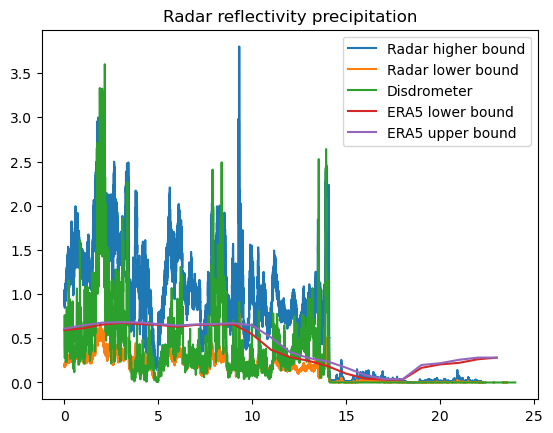

In [16]:
# April 26th is the 116th day of the year
subsetMinMod = minMod[115*24:116*24]
subsetMaxMod = maxMod[115*24:116*24]

plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.plot(disTime, snowRate, label='Disdrometer')
plt.plot(np.arange(0, 24, 1), subsetMinMod, label='ERA5 lower bound')
plt.plot(np.arange(0, 24, 1), subsetMaxMod, label='ERA5 upper bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [65]:
snowRateSmooth = gaussian_filter1d(snowRate, sigma=100)
#upperRadarSmooth = gaussian_filter1d(precipHigher[:, 0][~np.isnan(precipHigher[:, 0])], sigma=100)


Text(0.5, 1.0, 'Radar reflectivity precipitation')

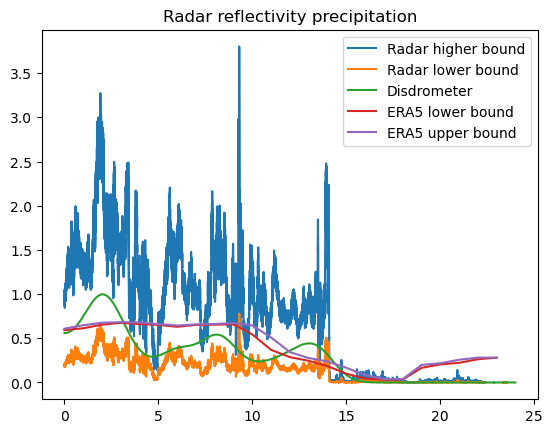

In [66]:
# April 26th is the 116th day of the year
subsetMinMod = minMod[115*24:116*24]
subsetMaxMod = maxMod[115*24:116*24]

plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.plot(disTime, snowRateSmooth, label='Disdrometer')
plt.plot(np.arange(0, 24, 1), subsetMinMod, label='ERA5 lower bound')
plt.plot(np.arange(0, 24, 1), subsetMaxMod, label='ERA5 upper bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [67]:
print(precipHigher.shape)

(27883, 496)


In [70]:
print(precipHigher[:, 0][~np.isnan(precipHigher[:, 0])].shape)

(26266,)


In [72]:
radarUpperAccum = np.trapz(precipHigher[:, 0][~np.isnan(precipHigher[:, 0])], dx=24/26266)
radarLowerAccum = np.trapz(precipLower[:, 0][~np.isnan(precipHigher[:, 0])], dx=24/26266)
disdAccum = np.trapz(snowRate, dx=24/2879)
eraUpperAccum = np.trapz(subsetMaxMod)
eraLowerAccum = np.trapz(subsetMinMod)

print(radarUpperAccum)
print(radarLowerAccum)
print(disdAccum)
print(eraUpperAccum)
print(eraLowerAccum)

17.415552
3.563639
6.952413
9.71818
8.977461
